#Libraries and Module Importation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [31]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Datasets/Jenkins_AntiMalaria_Dataset.xlsx")
df.head()

,Subdomain,ISO,Countries and areas,Key,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Population_growth(%),% of children under age 5 with fever,...,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,IPTP,AGO,Angola,AGO-2016,Eastern and Southern Africa,ESARO,Lower middle income,2016,3.586211,18.1,...,11.3,24.0,8.3,15.4,21.9,23.3,31.3,13.1,17.0,26.2
1,IPTP,BDI,Burundi,BDI-2010,Eastern and Southern Africa,ESARO,Low income,2010,4.679478,17.2,...,0.1,0.1,0.0,0.0,0.0,0.0,0.5,0.0,0.2,0.1
2,IPTP,BDI,Burundi,BDI-2017,Eastern and Southern Africa,ESARO,Low income,2017,2.287301,47.0,...,13.3,6.3,15.2,14.9,13.8,10.6,6.9,0.0,0.0,0.0
3,IPTP,BEN,Benin,BEN-2012,West and Central Africa,WCARO,Lower middle income,2012,2.915012,38.4,...,7.2,11.1,5.8,6.3,9.5,8.2,14.3,7.7,10.3,12.7
4,IPTP,BEN,Benin,BEN-2014,West and Central Africa,WCARO,Lower middle income,2014,2.926229,25.9,...,12.1,13.0,8.8,11.5,14.0,13.3,14.3,12.5,11.9,14.8


#Descriptive Analysis
###This involves summarizing and interpreting data to understand its key characteristics

In [32]:
print([df.columns])

[Index(['Subdomain', 'ISO', 'Countries and areas', 'Key',
       'UNICEF Reporting Region', 'UNICEF Programme Region',
       'World Bank Income Group (2022)', 'Year', 'Population_growth(%)',
       '% of children under age 5 with fever', 'No_of_Maternal_death',
       'Short Source', 'Long Source', 'National (%)', 'Male', 'Female',
       'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest',
       'None', 'Primary', 'Sec & Higher'],
      dtype='object')]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Subdomain                             1202 non-null   object 
 1   ISO                                   1202 non-null   object 
 2   Countries and areas                   1202 non-null   object 
 3   Key                                   1202 non-null   object 
 4   UNICEF Reporting Region               1202 non-null   object 
 5   UNICEF Programme Region               1202 non-null   object 
 6   World Bank Income Group (2022)        1202 non-null   object 
 7   Year                                  1202 non-null   int64  
 8   Population_growth(%)                  1202 non-null   float64
 9   % of children under age 5 with fever  1202 non-null   float64
 10  No_of_Maternal_death                  1202 non-null   int64  
 11  Short Source     

In [34]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,Subdomain,ISO,Countries and areas,Key,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Short Source,Long Source
0,IPTP,AGO,Angola,AGO-2016,Eastern and Southern Africa,ESARO,Lower middle income,DHS 2015-2016,Demographic and Health Survey 2015-2016
1,IPTP,BDI,Burundi,BDI-2010,Eastern and Southern Africa,ESARO,Low income,DHS 2010,Demographic and Health Survey 2010
2,IPTP,BDI,Burundi,BDI-2017,Eastern and Southern Africa,ESARO,Low income,DHS 2016-2017,Demographic and Health Survey 2016-2017
3,IPTP,BEN,Benin,BEN-2012,West and Central Africa,WCARO,Lower middle income,DHS 2011-2012,Demographic and Health Survey 2011-2012
4,IPTP,BEN,Benin,BEN-2014,West and Central Africa,WCARO,Lower middle income,MICS 2014,Multiple Indicator Cluster Survey 2014


In [35]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols.head()

,Year,Population_growth(%),% of children under age 5 with fever,No_of_Maternal_death,National (%),Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,2016,3.586211,18.1,3300,19.0,0.0,0.0,11.3,24.0,8.3,15.4,21.9,23.3,31.3,13.1,17.0,26.2
1,2010,4.679478,17.2,2600,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.5,0.0,0.2,0.1
2,2017,2.287301,47.0,2100,12.6,0.0,0.0,13.3,6.3,15.2,14.9,13.8,10.6,6.9,0.0,0.0,0.0
3,2012,2.915012,38.4,2400,8.8,0.0,0.0,7.2,11.1,5.8,6.3,9.5,8.2,14.3,7.7,10.3,12.7
4,2014,2.926229,25.9,2500,12.5,0.0,0.0,12.1,13.0,8.8,11.5,14.0,13.3,14.3,12.5,11.9,14.8


<Axes: >

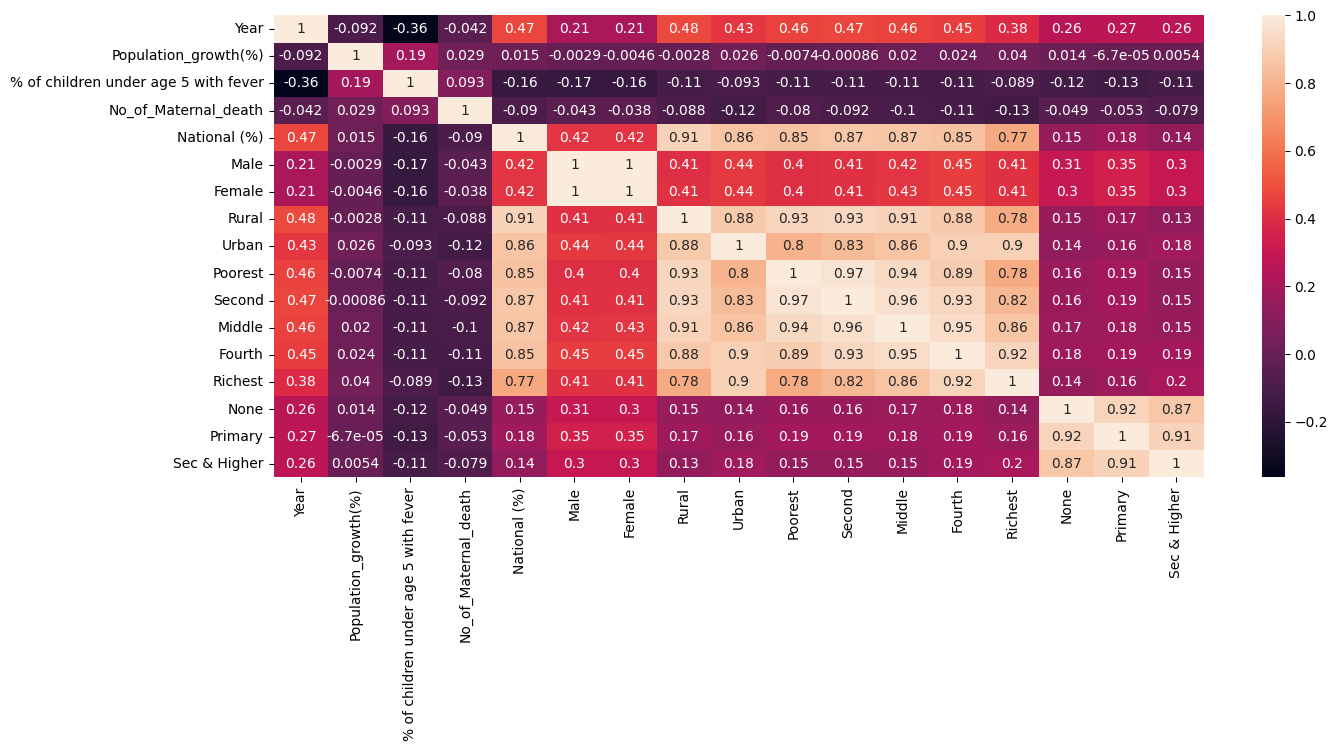

In [36]:

import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sn.heatmap(num_cols.corr(), cbar=True, annot=True)
#num_cols.corr()


In [37]:
df.describe([0.1,0.3,0.5,0.7,0.95,1]).T

,count,mean,std,min,10%,30%,50%,70%,95%,100%,max
Year,1202.0,2013.123960,4.874318,2000.000000,2006.000000,2010.000000,2014.000000,2016.000000,2020.950000,2021.000000,2021.000000
Population_growth(%),1202.0,2.684709,0.771819,-3.755484,2.041784,2.504546,2.711819,2.927755,3.638331,5.123598,5.123598
% of children under age 5 with fever,1202.0,21.328785,21.129925,0.000000,0.000000,0.000000,18.700000,33.140000,60.000000,76.900000,76.900000
No_of_Maternal_death,1202.0,6195.208819,15395.856944,0.000000,170.000000,1300.000000,2400.000000,3800.000000,20000.000000,86000.000000,86000.000000
National (%),1202.0,38.556572,24.661313,0.000000,5.600000,21.400000,38.050000,53.440000,79.495000,98.700000,98.700000
Male,1202.0,17.062895,25.161646,0.000000,0.000000,0.000000,0.000000,23.700000,70.285000,98.400000,98.400000
Female,1202.0,16.927704,25.049101,0.000000,0.000000,0.000000,0.000000,22.170000,69.785000,99.800000,99.800000
Rural,1202.0,37.364309,26.159072,0.000000,3.000000,17.830000,36.700000,53.200000,81.585000,100.000000,100.000000
Urban,1202.0,37.705158,25.079257,0.000000,4.000000,20.230000,36.700000,54.000000,79.285000,95.700000,95.700000
Poorest,1202.0,33.654992,26.353846,0.000000,0.720000,13.030000,31.450000,48.570000,80.995000,98.300000,98.300000


In [38]:
#df['Income Group Encoded'], unique = pd.factorize(df['World Bank Income Group (2022)'])

#print(df)
#print("Unique values:", unique)

In [39]:
df.head()

,Subdomain,ISO,Countries and areas,Key,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Population_growth(%),% of children under age 5 with fever,...,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,IPTP,AGO,Angola,AGO-2016,Eastern and Southern Africa,ESARO,Lower middle income,2016,3.586211,18.1,...,11.3,24.0,8.3,15.4,21.9,23.3,31.3,13.1,17.0,26.2
1,IPTP,BDI,Burundi,BDI-2010,Eastern and Southern Africa,ESARO,Low income,2010,4.679478,17.2,...,0.1,0.1,0.0,0.0,0.0,0.0,0.5,0.0,0.2,0.1
2,IPTP,BDI,Burundi,BDI-2017,Eastern and Southern Africa,ESARO,Low income,2017,2.287301,47.0,...,13.3,6.3,15.2,14.9,13.8,10.6,6.9,0.0,0.0,0.0
3,IPTP,BEN,Benin,BEN-2012,West and Central Africa,WCARO,Lower middle income,2012,2.915012,38.4,...,7.2,11.1,5.8,6.3,9.5,8.2,14.3,7.7,10.3,12.7
4,IPTP,BEN,Benin,BEN-2014,West and Central Africa,WCARO,Lower middle income,2014,2.926229,25.9,...,12.1,13.0,8.8,11.5,14.0,13.3,14.3,12.5,11.9,14.8


## Feature Engineering
###To determine our target variable, we assign weights to these three important variables

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
df[['Population_growth(%)', 'No_of_Maternal_death', '% of children under age 5 with fever']] = scaler.fit_transform(df[['Population_growth(%)', 'No_of_Maternal_death', '% of children under age 5 with fever']])

# Combine the features using a weighted sum (adjust weights as needed)
df['Demand_Index'] = 0.4 * df['Population_growth(%)'] + 0.3 * df['No_of_Maternal_death'] + 0.3 * df['% of children under age 5 with fever']
df['Demand_Index']=(df['Demand_Index'] * 100).round(2)
df['Demand_Index']

0       41.29
1       45.62
2       46.29
3       45.87
4       41.08
        ...  
1197    44.65
1198    55.67
1199    48.37
1200    21.60
1201    23.61
Name: Demand_Index, Length: 1202, dtype: float64

#Data Preprocessing
###To ensure effective learning from our datasets, we may need to preprocess or transform certain features so that our models can better understand them

'Subdomain', 'ISO', 'Countries and areas', 'Key',
       'UNICEF Reporting Region', 'UNICEF Programme Region',
       'World Bank Income Group (2022)', 'Year', 'Population_growth(%)',
       '% of children under age 5 with fever', 'No_of_Maternal_death',
       'Short Source', 'Long Source', 'National (%)', 'Male', 'Female',
       'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest',
       'None', 'Primary', 'Sec & Higher'],

In [42]:
from sklearn.preprocessing import StandardScaler

# Select numerical features and scale them
numerical_features = df[['Population_growth(%)', '% of children under age 5 with fever', 'National (%)',
                         'No_of_Maternal_death', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second',
                         'Middle', 'Fourth', 'Richest', 'Primary', 'Sec & Higher']]
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
numerical_features_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

# Select and encode categorical features



In [43]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = df[['Subdomain', 'ISO', 'World Bank Income Group (2022)']]
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' parameter removes one of the dummy variables to avoid multicollinearity

# Fit and transform the categorical features
categorical_features_encoded = encoder.fit_transform(categorical_features)
feature_names = encoder.get_feature_names_out(categorical_features.columns)
# Convert the encoded features into a DataFrame
categorical_features_encoded = pd.DataFrame(categorical_features_encoded, columns=feature_names)

# Combine numerical and categorical features
X = pd.concat([numerical_features_scaled, categorical_features_encoded], axis=1)

# Print the first few rows of the combined DataFrame
#print(X.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
X.isna().sum()

Population_growth(%)                                  0
% of children under age 5 with fever                  0
National (%)                                          0
No_of_Maternal_death                                  0
Male                                                  0
                                                     ..
ISO_ZAF                                               0
ISO_ZMB                                               0
ISO_ZWE                                               0
World Bank Income Group (2022)_Lower middle income    0
World Bank Income Group (2022)_Upper middle income    0
Length: 72, dtype: int64

In [45]:
Y=df['Demand_Index']

In [46]:
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

#Modeling
### We will apply several regression models and see the one with the highest accuracy

In [52]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (80% training, 20% temporary)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test of the remaining data)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [54]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

models = {
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "SVR": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

results = {}

for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Predict the target variable on the validation data
    Y_pred = model.predict(X_val)

    # Calculate the R-squared score (accuracy) on the validation data
    accuracy = r2_score(Y_val, Y_pred)

    # Store the results in the dictionary
    results[name] = accuracy

# Create a DataFrame from the results and print it
results_df = pd.DataFrame(results.items(), columns=['Model', 'R-squared'])
print(results_df.sort_values(by='R-squared', ascending=False))

                   Model  R-squared
0       Ridge Regression   0.999989
5          Decision Tree   0.998463
6          Random Forest   0.992398
1       Lasso Regression   0.974014
3    K-Nearest Neighbors   0.914769
2  ElasticNet Regression   0.864966
4                    SVR   0.812295


#Conclusion
Ridge regression gave us the highest accuracy with  0.999988 score value